<a href="https://colab.research.google.com/github/gyuchangShim/yolo_nas_practice/blob/main/custom_dataset_yolo_nas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install super-gradients
!pip install roboflow

In [6]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train,
    coco_detection_yolo_format_val
)
from super_gradients.training import models
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import (
    DetectionMetrics_050,
    DetectionMetrics_050_095
)
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback
from tqdm.auto import tqdm
from IPython.display import clear_output

import os
import requests
import zipfile
import cv2
import torch
import matplotlib.pyplot as plt
import glob
import numpy as np
import random

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="aIU6ug3LhFpJCcpMteMN")
project = rf.workspace("mjuaiimages").project("mju_ai_week02")
version = project.version(1)
dataset = version.download("yolov5")

In [3]:
# dataset_setup
dataset_params = {
    'data_dir': '/content/mju_ai_week02-1',
    'train_images_dir': 'train/images',
    'train_labels_dir': 'train/labels',
    'val_images_dir': 'valid/images',
    'val_labels_dir': 'valid/labels',
    'test_images_dir': 'test/images',
    'test_labels_dir': 'test/labels',
    'classes': ['cat', 'dog']
}

In [7]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
      'batch_size': 16,
      'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
      'batch_size': 16,
      'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
      'batch_size': 16,
      'num_workers': 2
    }
)

clear_output()

In [8]:
train_data.dataset.transforms
train_data.dataset.dataset_params['transforms'][1]
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

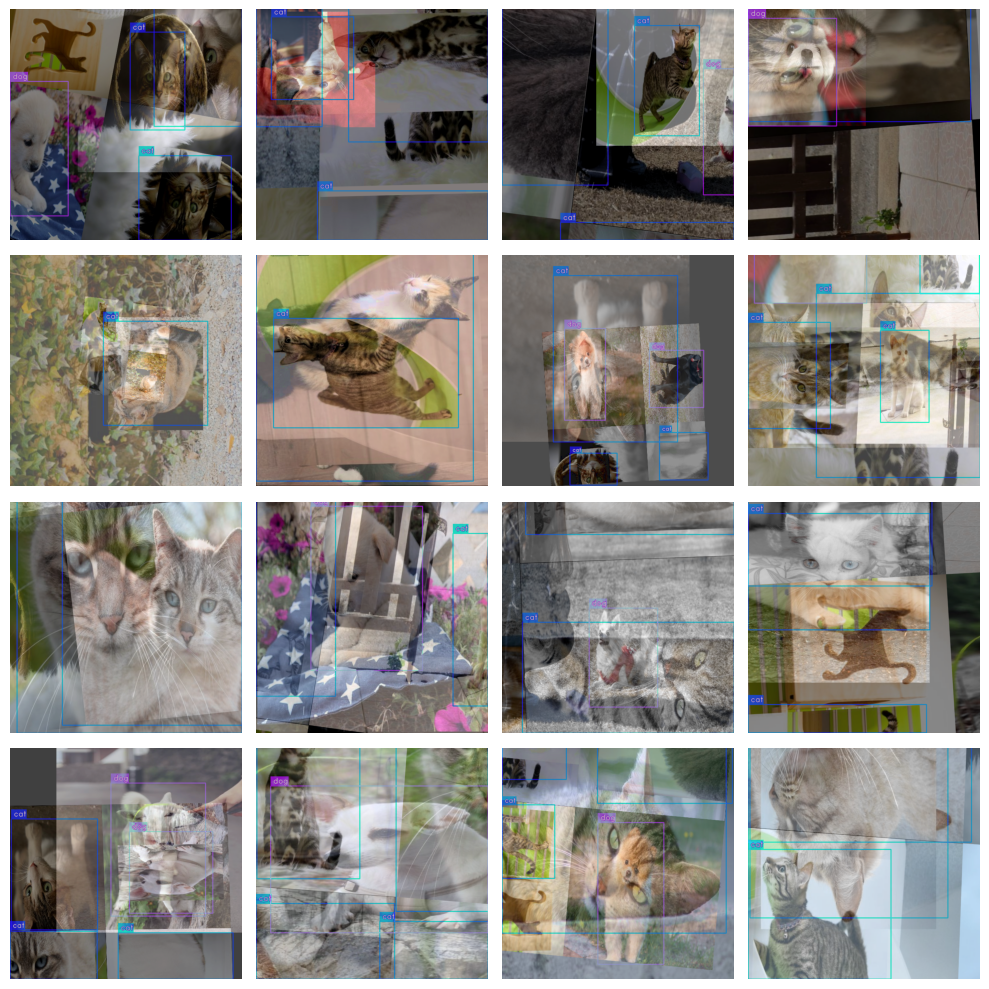

In [10]:
train_data.dataset.plot()